In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/praktikum07 ml/data/stock_dataset.csv')

df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Pilih kolom fitur dan kolom target
X = df[['open', 'high', 'low']]
y = df['close']


In [ ]:
# Hapus baris yang memiliki nilai kosong di kolom yang digunakan
df = df.dropna(subset=['open', 'high', 'low', 'close'])


In [ ]:
# Split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Buat model Linear Regression
model = LinearRegression()

# Latih model menggunakan data training
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Gunakan model untuk memprediksi nilai y pada data uji
y_pred = model.predict(X_test)


In [ ]:
# Hitung nilai MSE dan R² untuk menilai performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Koefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Koefisien regresi: [-0.70667637  0.85033434  0.85690381]
Intercept: -0.02829985210770758
Mean Squared Error: 1.0350468117599356
R² Score: 0.9998775898916312


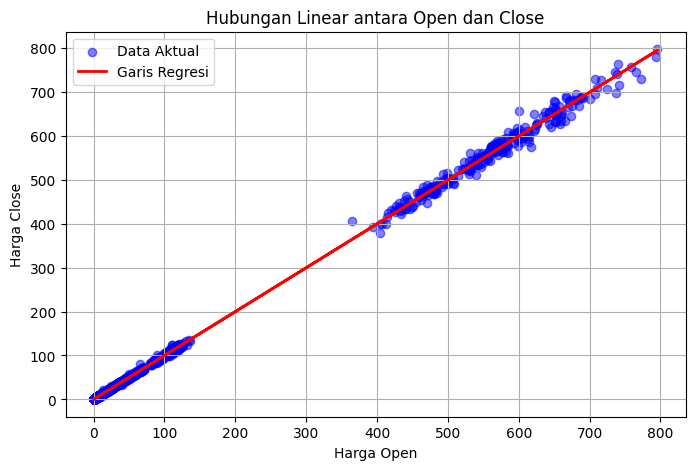

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ambil kolom 'open' dan 'close' saja agar bisa divisualisasikan 2D
X_single = df[['open']]
y_single = df['close']

# Buat dan latih model regresi linier
model_single = LinearRegression()
model_single.fit(X_single, y_single)

# Prediksi nilai close berdasarkan open
y_pred_single = model_single.predict(X_single)

# Buat scatter plot data aktual
plt.figure(figsize=(8,5))
plt.scatter(X_single, y_single, color='blue', alpha=0.5, label='Data Aktual')

# Buat garis regresi (hasil prediksi)
plt.plot(X_single, y_pred_single, color='red', linewidth=2, label='Garis Regresi')

# Tambahkan label dan judul
plt.xlabel("Harga Open")
plt.ylabel("Harga Close")
plt.title("Hubungan Linear antara Open dan Close")
plt.legend()
plt.grid(True)
plt.show()
